In [37]:
# Data Handling Libraries
import pandas as pd
import numpy as np

from sklearn.decomposition import NMF # Non-negative Matrix Factorization

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [2]:
df = pd.read_csv("spotify.xls", index_col=0)
df.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


In [3]:
df.shape

(1000, 5000)

In [4]:
x = df.values

In [5]:
x

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

In [6]:
nmf = NMF(n_components=100, random_state=200)

In [7]:
nmf.fit(x)

D:\Anaconda Installation\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
D:\Anaconda Installation\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


NMF(n_components=100, random_state=200)

In [8]:
user_matrix = nmf.transform(x)

D:\Anaconda Installation\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [9]:
user_matrix

array([[0.        , 0.        , 1.37436262, ..., 0.        , 0.        ,
        0.        ],
       [0.79174493, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.41081375, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.1750327 ],
       [0.        , 3.37343424, 0.67907102, ..., 0.        , 0.        ,
        0.67097795],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.64072164]])

In [10]:
user_matrix.shape

(1000, 100)

In [11]:
song_matrix = nmf.components_.T

In [12]:
song_matrix

array([[0.13099188, 0.26396419, 0.36500396, ..., 0.        , 0.        ,
        0.03992991],
       [0.28969775, 0.        , 0.02191636, ..., 0.01523965, 0.2709958 ,
        0.11459352],
       [0.        , 0.15651416, 0.01563097, ..., 0.13446851, 0.09786875,
        0.05432452],
       ...,
       [0.27916476, 0.36588488, 0.        , ..., 0.07748177, 0.05500395,
        0.18392522],
       [0.54143777, 0.15390772, 0.13017165, ..., 0.05047963, 0.        ,
        0.30028493],
       [0.34672694, 0.17403204, 0.08278889, ..., 0.0495085 , 0.20417414,
        0.35740174]])

In [13]:
song_matrix.shape

(5000, 100)

## Building a Recommendation System

In [14]:
# Recommendation system 1 :
# 1. In this method we will use the user matrix to build the recommendation.

# Steps
# 1. Consider recommending songs to user 1 who is located at row location zero
# 2. In order to do this we need to find the Euclidian distance between user 1 and remaining 999 users.
# 3. After finding the distance we will pickup 5 closest users to user 1.
# 4. We will recommend the songs heard by these 5 closest users to user 1.

In [15]:
def calculate_distance(user1, user2):
    return pow(sum([pow(user1[x] - user2[x],2) for x in range(len(user1))]),0.5)

In [16]:
calculate_distance(user_matrix[0],user_matrix[1])

13.024335464791392

In [17]:
def distance_all_users(base_user, user_matrix):
    
    distance = []
    for i in range(len(user_matrix)):
        if base_user != i:
            distance.append(calculate_distance(user_matrix[base_user],user_matrix[i]))
            
    return distance

In [18]:
distance_0 = distance_all_users(0,user_matrix)

In [19]:
distance_0

[13.024335464791392,
 13.43034993814982,
 12.667895157608305,
 14.203417696079123,
 12.840364282414725,
 10.761953699188286,
 11.253480510001246,
 13.62322543847175,
 12.644286385103312,
 13.017255461781579,
 12.317086664288885,
 12.100451151774644,
 10.484076522988948,
 13.644092480955237,
 12.39149367388021,
 13.07949873591488,
 13.967505075083986,
 14.672787693775117,
 11.306753894309054,
 11.734607637831202,
 14.380973232362916,
 13.245318308662076,
 13.234693141998607,
 15.205673492250144,
 14.108438218574435,
 13.990602085106014,
 12.827520628525784,
 13.63087638361889,
 12.534209526059765,
 12.869201975044593,
 12.93434451156828,
 13.554169043555683,
 13.554046123195796,
 12.381222591087154,
 13.264048322309476,
 12.846216664606015,
 13.174223689392095,
 15.171954647591372,
 13.589501359408443,
 11.246460196523232,
 13.155830567061498,
 13.615729765010158,
 10.839970368382762,
 11.648774181185539,
 13.522029422203856,
 13.643691785194537,
 12.535675965739923,
 12.334688865961704

In [20]:
np.sort(distance_0)

array([10.22796548, 10.40182959, 10.41740569, 10.46523753, 10.47347734,
       10.48407652, 10.71311743, 10.71826868, 10.71932398, 10.72079635,
       10.73140059, 10.75439218, 10.7619537 , 10.77120327, 10.80605548,
       10.81531873, 10.82970453, 10.83997037, 10.88430218, 10.91857414,
       10.92473555, 10.97932167, 11.00788068, 11.01053683, 11.01056629,
       11.0679343 , 11.08287928, 11.10561317, 11.1539721 , 11.1583452 ,
       11.17514348, 11.21341206, 11.21899468, 11.22831476, 11.23057818,
       11.23587356, 11.2464602 , 11.25348051, 11.25725102, 11.26375336,
       11.2740966 , 11.28208371, 11.294991  , 11.30675389, 11.31349125,
       11.31463243, 11.32693256, 11.32902132, 11.33779307, 11.34749145,
       11.36088377, 11.38829172, 11.39548477, 11.40654897, 11.42793972,
       11.4282507 , 11.44840581, 11.44893318, 11.45497385, 11.46332062,
       11.46527985, 11.47209967, 11.47332375, 11.5046393 , 11.50853422,
       11.50887637, 11.51655174, 11.51987148, 11.52239586, 11.54

In [21]:
np.argsort(distance_0)

array([561, 894, 773, 182, 331,  12, 604, 121, 241, 787, 195, 759,   5,
       138, 462, 896, 283,  42, 765, 226, 681, 737, 801, 628, 882, 317,
       902, 908, 441, 456, 716, 137, 647, 488,  75, 353,  39,   6,  98,
       150, 312, 306, 884,  18, 444, 178, 913, 285, 483, 527, 803, 637,
       627, 778, 198,  87, 885, 677, 410, 160, 869, 972, 757, 411, 940,
       446, 736, 236, 166, 393, 305, 956, 791, 208, 366, 540, 643, 179,
       947, 581, 863, 217, 291, 931, 967, 895, 398,  43, 214, 771, 112,
       788,  71, 303, 423, 586, 503, 146, 629,  19, 732, 152, 703, 368,
       938, 747, 222, 980, 381, 976, 294, 129, 385, 430, 240, 315, 955,
       579, 459, 287, 680, 207, 136, 981, 724, 687, 914, 986, 288, 701,
       626, 843, 155, 649, 186, 325, 491, 416, 499, 961, 290, 711, 171,
       746, 501, 335, 949, 175, 533,  76, 336, 754, 668, 990, 351, 212,
       196, 805, 127, 346, 792, 313, 994, 418, 959, 665, 948, 720, 611,
       295, 593, 840, 425, 824, 250, 793, 518,  69,  11, 372, 94

In [22]:
closest_users = np.argsort(distance_0)[0:5]

In [23]:
closest_users

array([561, 894, 773, 182, 331], dtype=int64)

In [24]:
for i in closest_users:
    print("Songs heard by", i, "are ")
    temp = pd.DataFrame(df.iloc[i+1])
    print(temp[temp.values != 0].index)

Songs heard by 561 are 
Index(['song_1', 'song_2', 'song_4', 'song_5', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_11',
       ...
       'song_4990', 'song_4991', 'song_4992', 'song_4993', 'song_4994',
       'song_4995', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4688)
Songs heard by 894 are 
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_11',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4692)
Songs heard by 773 are 
Index(['song_1', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_11',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4685)
Songs h

In [25]:
def recommend_songs(closest_users, df, no_of_songs):
    
    # picking out songs heard by the closest users
    temp = df.iloc[closest_users]
    
    #making a dictionary of songs heard maximum time by the closest users
    max_heard = temp.max().to_dict()
    
    # sorting the dictionary in the descending order such that the songs heard maximum time can be recommended
    sorted_dictionary = sorted(max_heard.items(), key=lambda keyvalue : (keyvalue[1],keyvalue[0]), reverse=True)[0:no_of_songs]
    
    return  [x[0] for x in sorted_dictionary]

In [26]:
print("Songs to be recommended to user 1 are", recommend_songs(closest_users,df,5))

Songs to be recommended to user 1 are ['song_998', 'song_996', 'song_995', 'song_993', 'song_990']


In [27]:
# Recommendation system 2 :
# 1. In this method we will use the song matrix to build recommendation.

# Steps:
# 1. First we will build clusters on the song matrix.
# 2. Then we will consider any user listening to a particular song. Eg Song 5
# 3. We will try to figure out in which particular cluster is song 5 present.
# 4. After that we will try to find out songs which are very close to song 5 in that particular cluster.
# 5. We will recommend those songs to users.

In [28]:
wcss ={}  ## withing Cluster sum of squares

for k in range(1,50):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(song_matrix)
    wcss[k] = kmeans.inertia_

In [29]:
wcss

{1: 14283.617976530875,
 2: 14120.174270037021,
 3: 13996.837821040152,
 4: 13905.783699474572,
 5: 13828.83366837961,
 6: 13764.591455432466,
 7: 13706.995729453121,
 8: 13654.125458964507,
 9: 13609.966889700594,
 10: 13561.157425717523,
 11: 13525.750349685764,
 12: 13481.8048923044,
 13: 13454.138260556241,
 14: 13420.495650500643,
 15: 13412.393049650758,
 16: 13369.932860822613,
 17: 13351.933510179275,
 18: 13336.557617936352,
 19: 13306.875895342731,
 20: 13280.077896656754,
 21: 13264.374772169253,
 22: 13244.19916306756,
 23: 13226.155463709341,
 24: 13225.553519153302,
 25: 13202.577021401481,
 26: 13187.842838881601,
 27: 13176.998771869885,
 28: 13158.296265347766,
 29: 13142.648798888906,
 30: 13126.952377866777,
 31: 13112.7526909869,
 32: 13090.461012054151,
 33: 13096.183265341255,
 34: 13077.223092686821,
 35: 13065.613148986144,
 36: 13049.237249846992,
 37: 13040.730942897011,
 38: 13025.856147174436,
 39: 13017.152874016158,
 40: 13003.62630452674,
 41: 12991.28929

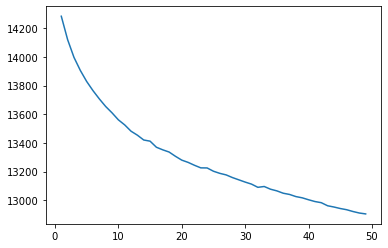

In [30]:
plt.plot(wcss.keys(), wcss.values())

In [35]:
def recommend_songs(df, n_cluster, song_matrix, song_name, no_of_songs):
    
    # Making clusters of the songs
    kmeans = KMeans(n_clusters = n_cluster, max_iter=100).fit(song_matrix)
    
    
    # Finding position of the song
    index_of_song = df.columns.to_list().index(song_name)
    
    # Picking up the genre values of the song
    song_vector = song_matrix[index_of_song]
    
    # Assigning distinct cluster numbers to the song
    all_song_in_cluster = list(kmeans.predict(song_matrix))
    
    #Finding out in which cluster other songs are present in the same cluster in which our song is residing
    song_cluster = [x for x in range(len(all_song_in_cluster)) if all_song_in_cluster[x]==kmeans.predict([song_vector])]
    
    ## Song genre values of the songs present in the same cluster from the song matrix
    song_numbers = song_matrix[song_cluster]
    
    ## Finding out the nearest songs using nearest neighbor algorithm 
    nn = NearestNeighbors(n_neighbors = no_of_songs)
    nn.fit(song_numbers)
    
    ## Picking out the nearest songs
    recommed_songs = nn.kneighbors([song_matrix[index_of_song]])
    
    ## Making a list of all songs
    song_list = df.columns
    
    return [song_list[x] for x in recommed_songs[1][0]]
    

In [36]:
recommend_songs(df,12, song_matrix, 'song_5', 5)

NameError: name 'NearestNeighbors' is not defined